## Preprocessing for Classification
Preparation:

- Preparation for cleanliness, analysis, integrity, visualization
- Preprocessing: Stuff we need to do to the data that is not needed for the operator (you, audience) but may be necessary for mapping our information mathematically in one way or another because the algorithms that become models are essentially formulate that need numbers

## Using the Titanic dataset

Use the function defined in acquire.py to load the Titanic data.

Use the function defined in prepare.py to prepare the titanic data.

Encode the categorical columns on train dataset. Create dummy variables of the categorical columns and concatenate them onto the dataframe. Remove the columns they are replacing. Repeat on validate and test.

Create a function named preprocess_titanic that accepts the train, validate, and test titanic data, and returns the dataframes ready for modeling.

In [2]:
import pandas as pd 
import numpy as np
import acquire 
import prepare 

In [3]:
titanic_df = acquire.get_titanic_data()
titanic_df

this file exists, reading csv


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


<Axes: >

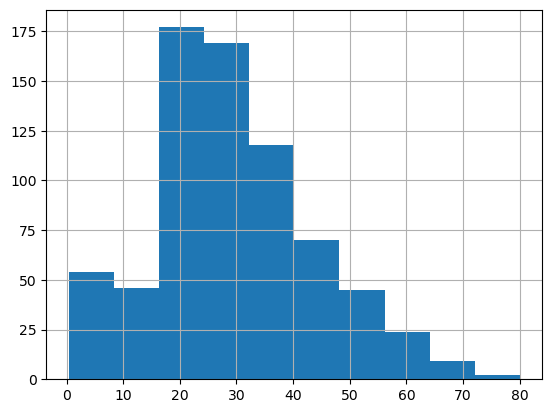

In [4]:
titanic_df.age.hist()

In [5]:
titanic_df.isnull().sum()

passenger_id      0
survived          0
pclass            0
sex               0
age             177
sibsp             0
parch             0
fare              0
embarked          2
class             0
deck            688
embark_town       2
alone             0
dtype: int64

In [6]:
t_df = prepare.clean_titanic(titanic_df)
t_df

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,0,3,male,1,0,7.2500,Southampton,0
1,1,1,1,female,1,0,71.2833,Cherbourg,0
2,2,1,3,female,0,0,7.9250,Southampton,1
3,3,1,1,female,1,0,53.1000,Southampton,0
4,4,0,3,male,0,0,8.0500,Southampton,1
...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,0,0,13.0000,Southampton,1
887,887,1,1,female,0,0,30.0000,Southampton,1
888,888,0,3,female,1,2,23.4500,Southampton,0
889,889,1,1,male,0,0,30.0000,Cherbourg,1


In [7]:
t_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    object 
 3   sex           891 non-null    object 
 4   sibsp         891 non-null    int64  
 5   parch         891 non-null    int64  
 6   fare          891 non-null    float64
 7   embark_town   891 non-null    object 
 8   alone         891 non-null    int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 69.6+ KB


In [8]:
t_df.embark_town.value_counts()

embark_town
Southampton    646
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [9]:
t_df.embark_town.mode()

0    Southampton
Name: embark_town, dtype: object

In [10]:
t_df['sex'][:10]

0      male
1    female
2    female
3    female
4      male
5      male
6      male
7      male
8    female
9    female
Name: sex, dtype: object

In [11]:
np.where(t_df['sex'] == 'male', 1, 0)[:5]

array([1, 0, 0, 0, 1])

In [12]:
t_df = t_df.assign(sex_male = np.where(t_df['sex'] == 'male', 1, 0))

In [13]:
t_df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male
0,0,0,3,male,1,0,7.2500,Southampton,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0
3,3,1,1,female,1,0,53.1000,Southampton,0,0
4,4,0,3,male,0,0,8.0500,Southampton,1,1


In [14]:
t_df.loc[:,'is_female'] = t_df.sex.map({'male': 0 , 'female': 1})

In [15]:
t_df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,is_female
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,1
2,2,1,3,female,0,0,7.9250,Southampton,1,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0


In [16]:
t_df[['is_queenstown', 'is_southampton']] = pd.get_dummies(t_df.embark_town, drop_first=True).astype(int)

In [17]:
t_df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,is_female,is_queenstown,is_southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,1,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,1,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,1,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,0,1


In [18]:
t_df_encoded = t_df.drop(columns=['sex', 'embark_town'])

In [19]:
t_df_encoded.head()

,passenger_id,survived,pclass,sibsp,parch,fare,alone,sex_male,is_female,is_queenstown,is_southampton
0,0,0,3,1,0,7.2500,0,1,0,0,1
1,1,1,1,1,0,71.2833,0,0,1,0,0
2,2,1,3,0,0,7.9250,1,0,1,0,1
3,3,1,1,1,0,53.1000,0,0,1,0,1
4,4,0,3,0,0,8.0500,1,1,0,0,1


In [20]:
t_df.columns

Index(['passenger_id', 'survived', 'pclass', 'sex', 'sibsp', 'parch', 'fare',
       'embark_town', 'alone', 'sex_male', 'is_female', 'is_queenstown',
       'is_southampton'],
      dtype='object')

## Using telco dataset

- Use the function defined in acquire.py to load the Telco data.
- Use the function defined in prepare.py to prepare the Telco data.
- Encode the categorical columns on train.
- Encode at least one column using .replace
- Encode at least one column using .map
- Encode the rest of the columns by creating dummy variables and concatenating them onto the dataframe.
- Repeat the same steps on validate and test.
- Create a function named prep_telco that accepts the train, validate, and test telco data, and returns the dataframes ready for modeling.

In [21]:
telco_data = acquire.get_telco_data()
telco_data.head()

this file exists, reading csv


,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [22]:
telco_df = prepare.prep_telco(telco_data)
telco_df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [23]:
train, validate, test = prepare.splitting_data(telco_df, 'churn')

In [24]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
2865,4083-BFNYK,Female,1,Yes,No,38,Yes,Yes,Yes,Yes,...,No,No,Yes,No,95.00,3591.25,No,One year,Fiber optic,Credit card (automatic)
4107,5804-LEPIM,Female,1,No,No,2,Yes,No,No,No,...,No,No,No,Yes,70.35,139.05,Yes,Month-to-month,Fiber optic,Electronic check
3453,4895-TMWIR,Male,1,Yes,No,11,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,No,19.95,214.75,Yes,Month-to-month,NaN,Mailed check
923,1342-JPNKI,Male,0,No,No,10,Yes,Yes,No,No,...,No,Yes,No,Yes,86.05,834.1,Yes,Month-to-month,Fiber optic,Bank transfer (automatic)
2370,3397-AVTKU,Male,0,No,No,43,Yes,No,No,Yes,...,No,No,Yes,Yes,60.00,2548.55,No,Two year,DSL,Electronic check


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4225 entries, 2865 to 5354
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            4225 non-null   object 
 1   gender                 4225 non-null   object 
 2   senior_citizen         4225 non-null   int64  
 3   partner                4225 non-null   object 
 4   dependents             4225 non-null   object 
 5   tenure                 4225 non-null   int64  
 6   phone_service          4225 non-null   object 
 7   multiple_lines         4225 non-null   object 
 8   online_security        4225 non-null   object 
 9   online_backup          4225 non-null   object 
 10  device_protection      4225 non-null   object 
 11  tech_support           4225 non-null   object 
 12  streaming_tv           4225 non-null   object 
 13  streaming_movies       4225 non-null   object 
 14  paperless_billing      4225 non-null   object 
 15  monthl

In [26]:
train.isna().sum()

customer_id                0
gender                     0
senior_citizen             0
partner                    0
dependents                 0
tenure                     0
phone_service              0
multiple_lines             0
online_security            0
online_backup              0
device_protection          0
tech_support               0
streaming_tv               0
streaming_movies           0
paperless_billing          0
monthly_charges            0
total_charges              0
churn                      0
contract_type              0
internet_service_type    918
payment_type               0
dtype: int64

In [27]:
train.internet_service_type.value_counts()

internet_service_type
Fiber optic    1898
DSL            1409
Name: count, dtype: int64

In [28]:
train['internet_service_type'] = train.internet_service_type.fillna(value='None')

In [29]:
train.internet_service_type.value_counts()

internet_service_type
Fiber optic    1898
DSL            1409
None            918
Name: count, dtype: int64

## Encode at least one column using .replace

In [30]:
train['gender'][:10]

2865    Female
4107    Female
3453      Male
923       Male
2370      Male
713     Female
2941    Female
935       Male
302       Male
869       Male
Name: gender, dtype: object

In [31]:
train['is_female'] = train.gender.replace({'Female': 1, 'Male': 0}).astype(int)

In [32]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,is_female
2865,4083-BFNYK,Female,1,Yes,No,38,Yes,Yes,Yes,Yes,...,No,Yes,No,95.00,3591.25,No,One year,Fiber optic,Credit card (automatic),1
4107,5804-LEPIM,Female,1,No,No,2,Yes,No,No,No,...,No,No,Yes,70.35,139.05,Yes,Month-to-month,Fiber optic,Electronic check,1
3453,4895-TMWIR,Male,1,Yes,No,11,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No,19.95,214.75,Yes,Month-to-month,None,Mailed check,0
923,1342-JPNKI,Male,0,No,No,10,Yes,Yes,No,No,...,Yes,No,Yes,86.05,834.1,Yes,Month-to-month,Fiber optic,Bank transfer (automatic),0
2370,3397-AVTKU,Male,0,No,No,43,Yes,No,No,Yes,...,No,Yes,Yes,60.00,2548.55,No,Two year,DSL,Electronic check,0


## Encode at least one column using .map

In [33]:
train['is_male'] = train.gender.map({'Male': 1, 'Female': 0})

In [34]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,is_female,is_male
2865,4083-BFNYK,Female,1,Yes,No,38,Yes,Yes,Yes,Yes,...,Yes,No,95.00,3591.25,No,One year,Fiber optic,Credit card (automatic),1,0
4107,5804-LEPIM,Female,1,No,No,2,Yes,No,No,No,...,No,Yes,70.35,139.05,Yes,Month-to-month,Fiber optic,Electronic check,1,0
3453,4895-TMWIR,Male,1,Yes,No,11,Yes,No,No internet service,No internet service,...,No internet service,No,19.95,214.75,Yes,Month-to-month,None,Mailed check,0,1
923,1342-JPNKI,Male,0,No,No,10,Yes,Yes,No,No,...,No,Yes,86.05,834.1,Yes,Month-to-month,Fiber optic,Bank transfer (automatic),0,1
2370,3397-AVTKU,Male,0,No,No,43,Yes,No,No,Yes,...,Yes,Yes,60.00,2548.55,No,Two year,DSL,Electronic check,0,1


## Encode the rest of the columns by creating dummy variables and concatenating them onto the dataframe.

In [35]:
train['is_partner'] = pd.get_dummies(train.partner, drop_first=True).astype(int)

In [36]:
train['is_dependents'] = pd.get_dummies(train.dependents, drop_first=True).astype(int)

In [37]:
train['has_phone_service'] = pd.get_dummies(train.phone_service, drop_first=True).astype(int)

In [38]:
train[['has_multiple_lines', 'has_no_phone_service']] = pd.get_dummies(train.multiple_lines, drop_first=True).astype(int)

In [39]:
train.multiple_lines.value_counts()

multiple_lines
No                  2020
Yes                 1811
No phone service     394
Name: count, dtype: int64

In [40]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,contract_type,internet_service_type,payment_type,is_female,is_male,is_partner,is_dependents,has_phone_service,has_multiple_lines,has_no_phone_service
2865,4083-BFNYK,Female,1,Yes,No,38,Yes,Yes,Yes,Yes,...,One year,Fiber optic,Credit card (automatic),1,0,1,0,1,0,1
4107,5804-LEPIM,Female,1,No,No,2,Yes,No,No,No,...,Month-to-month,Fiber optic,Electronic check,1,0,0,0,1,0,0
3453,4895-TMWIR,Male,1,Yes,No,11,Yes,No,No internet service,No internet service,...,Month-to-month,None,Mailed check,0,1,1,0,1,0,0
923,1342-JPNKI,Male,0,No,No,10,Yes,Yes,No,No,...,Month-to-month,Fiber optic,Bank transfer (automatic),0,1,0,0,1,0,1
2370,3397-AVTKU,Male,0,No,No,43,Yes,No,No,Yes,...,Two year,DSL,Electronic check,0,1,0,0,1,0,0


In [41]:
train[['has_online_security', 's_no_internet']] = pd.get_dummies(train.online_security, drop_first=True).astype(int)

In [42]:
train[['has_online_backup', 'b_no_internet']] = pd.get_dummies(train.online_backup, drop_first=True).astype(int)

In [43]:
train.contract_type.value_counts()

contract_type
Month-to-month    2335
Two year          1011
One year           879
Name: count, dtype: int64

In [44]:
train[['has_month_to_month', 'has_two_year']] = pd.get_dummies(train.online_security, drop_first=True).astype(int)

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4225 entries, 2865 to 5354
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            4225 non-null   object 
 1   gender                 4225 non-null   object 
 2   senior_citizen         4225 non-null   int64  
 3   partner                4225 non-null   object 
 4   dependents             4225 non-null   object 
 5   tenure                 4225 non-null   int64  
 6   phone_service          4225 non-null   object 
 7   multiple_lines         4225 non-null   object 
 8   online_security        4225 non-null   object 
 9   online_backup          4225 non-null   object 
 10  device_protection      4225 non-null   object 
 11  tech_support           4225 non-null   object 
 12  streaming_tv           4225 non-null   object 
 13  streaming_movies       4225 non-null   object 
 14  paperless_billing      4225 non-null   object 
 15  monthl

In [48]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,is_dependents,has_phone_service,has_multiple_lines,has_no_phone_service,has_online_security,s_no_internet,has_online_backup,b_no_internet,has_month_to_month,has_two_year
2865,4083-BFNYK,Female,1,Yes,No,38,Yes,Yes,Yes,Yes,...,0,1,0,1,0,1,0,1,0,1
4107,5804-LEPIM,Female,1,No,No,2,Yes,No,No,No,...,0,1,0,0,0,0,0,0,0,0
3453,4895-TMWIR,Male,1,Yes,No,11,Yes,No,No internet service,No internet service,...,0,1,0,0,1,0,1,0,1,0
923,1342-JPNKI,Male,0,No,No,10,Yes,Yes,No,No,...,0,1,0,1,0,0,0,0,0,0
2370,3397-AVTKU,Male,0,No,No,43,Yes,No,No,Yes,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
train[['has_month_to_month', 'has_two_year']] = pd.get_dummies(train.online_security, drop_first=True).astype(int)

In [ ]:
def mutate_data(data):
    for user in data:
        for column in user :
            if column in ['customer_id', 'tenure']:
                continue
            if user[column] in ['yes', 'male']:
                user[column] = 1
            if user[column] in ['female', 'no']:
                user[column] = 0

    return data